# Phương pháp toán nâng cao cho TTNT

Thông tin học viên
- Họ và tên: Lê Nhựt Nam
- MSHV: 22C11067

Bài tập về nhà

**BT1**: 

Khảo sát 2 đại lượng $x, y$. Cho bảng dữ liệu sau:

| $x$  	|  0.1 	|  0.2 	|  0.3 	|  0.4 	|
|---	|---	|---	|---	|---	|
| $y$  	|  10.1 	|  10.4 	|  10.7 	|  11.2 	|

Với mô hình được cho sau, xác định các tham số a, b, c của mô hình

$$
y = f(x) = ax^2 + bx + c
$$

***Lời giải***: Dùng phương pháp bình phương tối tiểu (ordinary least squares) để giải quyết bài toán

Rất dễ dàng có được dạng cho bài toán:

$$
y = \boldsymbol x^\top\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
Trong đó $\boldsymbol x\in\mathbb{R}^D$ là các giá trị đầu vào (biến độc lập) và $y\in\mathbb{R}$ là giá trị quan sát (biến phụ thuộc).  Parameter vector $\boldsymbol\theta\in\mathbb{R}^D$ tham số hóa hàm số.

Sử dụng ước lượng triển vọng cực đại (Maximum Likelihood Estimate), ta có thể hoàn toàn tìm được tham số $\boldsymbol\theta^{\mathrm{ML}}$ mà cực đại triển vọng:

$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$

Chứng minh được nghiệm bài toán là duy nhất và có công thức là:

$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^\top\boldsymbol X)^{-1}\boldsymbol X^\top\boldsymbol y\in\mathbb{R}^D\,,
$$
Trong đó:
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^\top\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^\top \in\mathbb{R}^N\,.
$$

**Nhưng mô hình cần ước lượng không phải dạng đường thẳng, đó là một đường cong**. Có nghĩa là, chúng ta cần học một hàm

$$
f(\boldsymbol x, \boldsymbol\theta) = \sum_{k = 1}^K \theta_k \phi_k(\boldsymbol x)\,,
$$
Trong đó: đặc trưng $\phi_k(\boldsymbol x)$ (có khả năng phi tuyến) biến đổi của các giá trị đầu vào $\boldsymbol x$.

Nhìn vào dạng mô hình trên, đó là một đa thức bậc hai (một cách tổng quát cho trường hợp đa thức bậc K)

$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^\top\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$

$\boldsymbol\phi(x)$ là một đặc trưng biến đổi phi tuyến của các giá trị đầu vào $x\in\mathbb{R}$.

Một cách tương tự, định nghĩa lại ma trận cho tất cả các biến đổi đặc trưng phi tuyến cho dữ liệu đầu vào:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^\top \in\mathbb{R}^{N\times K+1}
$$

Chứng minh được nghiệm bài toán là duy nhất và có công thức là:

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^\top\boldsymbol\Phi)^{-1}\boldsymbol\Phi^\top\boldsymbol y
$$

***Nghiệm tối ưu hóa tính toán số học***:

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^\top\boldsymbol\Phi + \kappa\boldsymbol I)^{-1}\boldsymbol\Phi^\top\boldsymbol y, \kappa>0
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

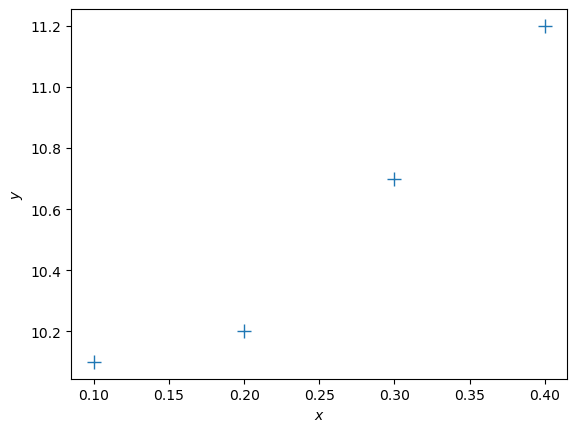

In [4]:
# Định nghĩa tập huấn luyện
X = np.array([0.1, 0.2, 0.3, 0.4]).reshape(-1,1) # 4x1 vector, N=4, D=1
y = np.array([10.1, 10.2, 10.7, 11.2]).reshape(-1,1) # 4x1 vector

# Trực quan hóa
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [7]:
# Tính toán đặc trưng phi tuyến
# X: đầu vào có size N x 1
# K: bậc của đa thức
# tính toán ma trận đặc trưng Phi (N x (K+1))

N = X.shape[0]
K = 2

X = X.flatten()

Phi = np.zeros((N, K+1))
for k in range(K+1):
    Phi[:,k] = X**k
    
Phi

array([[1.  , 0.1 , 0.01],
       [1.  , 0.2 , 0.04],
       [1.  , 0.3 , 0.09],
       [1.  , 0.4 , 0.16]])

In [26]:
kappa = 1e-08
theta_ml = np.linalg.inv(Phi.T @ Phi + kappa*np.eye(Phi.shape[1])) @ Phi.T @ y
theta_ml

array([[10.09998591],
       [-1.19986045],
       [ 9.99972238]])

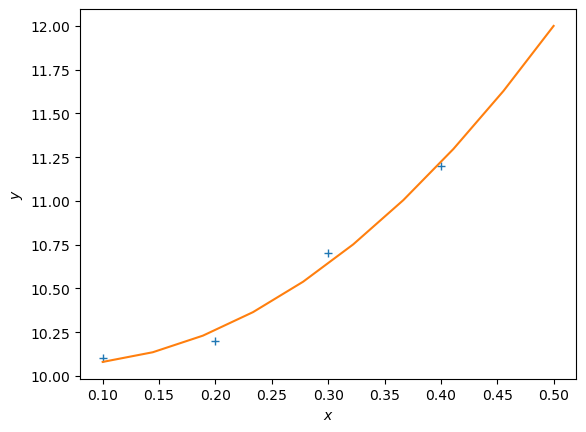

In [27]:
Xtest = np.linspace(0.1,0.5,10).reshape(-1,1)

Xtest = Xtest.flatten()

Phi_test = np.zeros((Xtest.shape[0], K+1))
for k in range(K+1):
    Phi_test[:,k] = Xtest**k

y_pred = Phi_test @ theta_ml

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

**BT2**

Tương tự BT1

Khảo sát 2 đại lượng $x, y$. Cho bảng dữ liệu sau:

| $x_1$  	|  $x_2$ 	|  $y$ 	|
|---	|---	|---	|
|  1 	|  2 	|  3 	|
|  2 	|  1 	|  5 	|
|  3 	|  4 	|  13 	|
|  4 	|  1 	|  17 	|

Với 2 mô hình tự đề xuất, xác định các tham số của mô hình.

***Lời giải***: Nhận thấy dữ liệu có thể mô hình hóa đơn giản bằng mô hình hồi quy tuyến tính bội 

$$y_i = \theta_0 + \sum_{j=1}^p\theta_jx_{ij} + e_i, \forall i \in \{1,...,n\}$$
Trong đó:
- $y_i \in \mathbb{R}$ là giá trị thực tương ứng với quan sát thứ $i$
- $\theta_0 \in R$ là hệ số chặn hồi quy (regression intercept)
- $\theta_j \in \mathbb{R}$ là các hệ số hồi quy (regression slope) của giá trị dự đoán thứ $j$
- $x_{ij} \in \mathbb{R}$ là giá trị dự đoán thứ $j$ cho quan sát thứ $i$
- $e_i \overset{\underset{\mathrm{iid}}{}}{\sim} \mathcal{N}(0, \sigma^2)$ một Gaussian Error

Hay viết gọn hơn bằng dạng ma trận như sau

$$\mathbf{y = X\theta + e}$$
Trong đó:
- $\mathbf{y} = (y_1, y_2, ..., y_n)' \in \mathbb{R}^n$ có kích thước $n \times 1$ là vector các giá trị tương ứng với biến quan sát
- $\mathbf{X = [1_n, x_1, x_2, ..., x_p]} \in \mathbb{R}^{n\times (p+1)}$ có kích thước  $n \times (p + 1)$ là ma trận biến quan sát
- $\mathbf{\theta} = (\theta_0, \theta_1, \theta_2, ..., \theta_p)' \in \mathbb{R}^{p+1}$ có kích thước $(p + 1) \times n$ là vector các hệ số hồi quy (coefficient vector)
- $\mathbf{e} = (e_1, e_2, ..., e_n)' \in \mathbb{R}^n$ là vector độ lỗi (error vector)

Chứng minh được bài toán có nghiệm duy nhất bằng phương pháp ước lượng triển vọng cực đại

$$
\boldsymbol \theta^\text{ML} = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top\boldsymbol y
$$

In [50]:
# Định nghĩa tập huấn luyện
X = np.array([[1, 2], [2, 1], [3, 4], [4, 1]])
y = np.array([3, 5, 13, 17])

In [38]:
X_aug = np.hstack([np.ones((X.shape[0],1)), X])
X_aug

array([[1., 1., 2.],
       [1., 2., 1.],
       [1., 3., 4.],
       [1., 4., 1.]])

In [42]:
theta_ml = np.linalg.pinv(X_aug) @ y
print("Dạng hàm thứ nhất: f(x_1, x_2) = {}x_1 + {}x_2 + {}".format(theta_ml[1], theta_ml[2], theta_ml[0]))

Dạng hàm thứ nhất: f(x) = 4.999999999999999x_1 + 0.6666666666666687x_2 + -4.33333333333333


In [41]:
# Phần dư r
X_aug @ theta_ml - y

array([-1.        ,  1.33333333,  0.33333333, -0.66666667])

In [55]:
def polynomial_features(x, order):
    x = np.asarray(x).T[np.newaxis]
    n = x.shape[1]
    power_matrix = np.tile(np.arange(order + 1), (n, 1)).T[..., np.newaxis]
    X = np.power(x, power_matrix)
    I = np.indices((order + 1, ) * n).reshape((n, (order + 1) ** n)).T
    F = np.product(np.diagonal(X[I], 0, 1, 2), axis=2)
    return F.T

Phi_X = polynomial_features(X, 2)
Phi_X

array([[  1,   2,   4,   1,   2,   4,   1,   2,   4],
       [  1,   1,   1,   2,   2,   2,   4,   4,   4],
       [  1,   4,  16,   3,  12,  48,   9,  36, 144],
       [  1,   1,   1,   4,   4,   4,  16,  16,  16]])

In [60]:
theta_ml = np.linalg.pinv(Phi_X) @ y
theta_ml
print("Dạng hàm thứ hai: f(x_1, x_2) = {} + {}x1 + {}x1**2 + {}x2 + {}x1*x2 + {}x1**2*x2 + {}x2**2 + {}x1*x2**2 + {}x1**2*x2**2".format(theta_ml[1], theta_ml[2], theta_ml[3], theta_ml[4], theta_ml[5], theta_ml[6], theta_ml[7], theta_ml[8], theta_ml[0]))

Dạng hàm thứ hai: f(x_1, x_2) = 0.13688512309179662 + 0.19963250473706284x1 + 0.17306491081965936x1**2 + 0.18339569086805763x2 + 0.07779978631944456x1*x2 + 0.5900341336632491x1**2*x2 + 0.4741074490662376x2**2 + -0.13651831406401346x1*x2**2 + 0.08446852149492834x1**2*x2**2


In [61]:
# Phần dư r
Phi_X @ theta_ml - y

array([-3.55271368e-15,  3.55271368e-15, -1.77635684e-14,  3.55271368e-15])